In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score



df = pd.read_csv(r'D:\Study Material\Projects\Titanic Survival Prediction/Titanic-Dataset.csv')


In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
Mean age ~ 30

SyntaxError: invalid syntax (2952332143.py, line 1)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [ ]:
df.isnull().sum()

In [ ]:
177 missing Age entries, 687 missing Cabin entries

In [ ]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})


In [ ]:
df.head(5)

In [ ]:
df.isna()

In [ ]:
data = df['Survived'].value_counts()

plt.figure(figsize=(5, 4))
plt.pie(data, labels=data.index, autopct='%1.1f%%', colors=sns.color_palette("muted"))

plt.show()

In [ ]:
plt.figure(figsize=(6, 4))

sns.histplot(df['Age'], bins=10, color="orange")

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")

plt.show()

In [ ]:
df.Age.median()

In [ ]:
df.Age.mean()

In [ ]:
df.Age.mode()

In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
df.isnull().sum()

In [ ]:
df.drop(columns=['Cabin'], inplace=True)


In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize=(6, 4))

sns.countplot(x=df['Survived'], palette='muted')

plt.xlabel("Survival (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Survival Count")

plt.show()

In [ ]:
plt.figure(figsize=(10, 4))

sns.barplot(hue=df['Survived'], y=df['Age'],width=0.5, palette='muted')

plt.xlabel("Survival")
plt.ylabel("Age")
plt.title("Age vs Survival Rate")

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Sex'], palette='muted')

plt.xlabel("0=Female, 1=Male")
plt.ylabel("Sex")
plt.show()

In [ ]:
survival_counts = df[df['Survived'] == 1]['Sex'].value_counts()

plt.figure(figsize=(6, 4))
colors = ['lightblue', 'orange']
survival_counts.plot.pie(autopct='%1.1f%%', colors=colors ,wedgeprops={'edgecolor': 'white'})

plt.ylabel('')
plt.title("Survival Percentage by Gender")

plt.show()

In [ ]:
pclass_counts = df['Pclass'].value_counts()

colors = sns.color_palette("pastel", len(pclass_counts))  
labels = [f'Class {pclass}' for pclass in pclass_counts.index]

plt.figure(figsize=(6, 4))
pclass_counts.plot.pie(autopct='%1.1f%%', labels=labels, colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'})

plt.title("Passenger Class Distribution")
plt.ylabel('') 

plt.show()

In [ ]:
survival_counts = df[df['Survived'] == 1]['Pclass'].value_counts()

colors = sns.color_palette("pastel", len(survival_counts))  
labels = [f'Class {pclass}' for pclass in survival_counts.index] 

plt.figure(figsize=(6, 4))
survival_counts.plot.pie(autopct='%1.1f%%', labels=labels, colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'})

plt.title("Survival Percentage by Passenger Class")
plt.ylabel('') 

plt.show()

In [ ]:
parch_counts = df['Parch'].value_counts()

colors = sns.color_palette("pastel", len(parch_counts))  
labels = [f'Parch {parch}' for parch in parch_counts.index] 

plt.figure(figsize=(6, 5))
parch_counts.plot.pie(autopct='%1.1f%%', labels=labels, colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("Parch (Parents/Children Aboard) Distribution")
plt.ylabel('') 

plt.show()

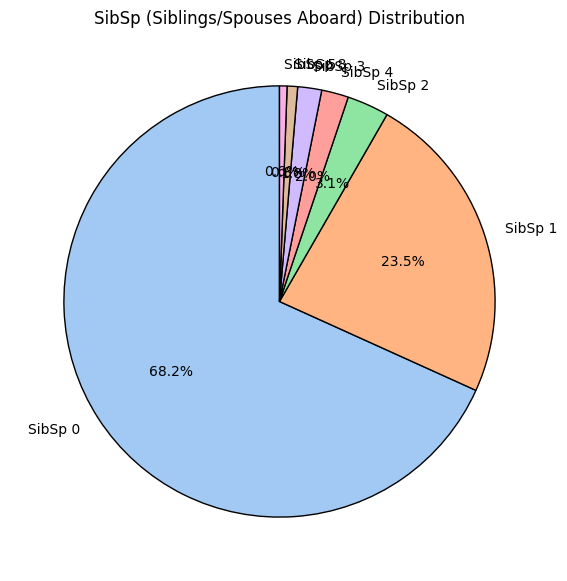

In [95]:
sibsp_counts = df['SibSp'].value_counts()

colors = sns.color_palette("pastel", len(sibsp_counts)) 
labels = [f'SibSp {sibsp}' for sibsp in sibsp_counts.index]  

plt.figure(figsize=(7, 7))
sibsp_counts.plot.pie(autopct='%1.1f%%', labels=labels, colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})

plt.title("SibSp (Siblings/Spouses Aboard) Distribution")
plt.ylabel('')
plt.show()

In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(x='Sex', y='Survived', data=df, estimator=lambda x: sum(x), palette='muted')

plt.title("Survival Count by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Survival Count", fontsize=12)

plt.show()

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Sex', hue='Survived', data=df, palette='muted')

plt.title("Survival & Death Count by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Survival Status", labels=["Died (0)", "Survived (1)"])

plt.show()


In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='muted')

plt.title("Survival & Death Count by Passenger Class", fontsize=14)
plt.xlabel("Passenger Class (Pclass)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=["Class 1", "Class 2", "Class 3"]) 
plt.legend(title="Survival Status", labels=["Died (0)", "Survived (1)"])

plt.show()

In [ ]:
bins = [0, 10, 20, 30, 40, 50, 60, 80]  
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

plt.figure(figsize=(8, 5))
sns.countplot(x='AgeGroup', hue='Survived', data=df, palette='muted')

plt.title("Survival & Death Count by Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Survival Status", labels=["Died (0)", "Survived (1)"])

plt.show()


In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Parch', hue='Survived', data=df, palette='muted')

plt.title("Survival & Death Count by Number of Parents/Children Aboard (Parch)", fontsize=14)
plt.xlabel("Number of Parents/Children Aboard (Parch)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Survival Status", labels=["Died (0)", "Survived (1)"])

plt.show()

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x='SibSp', hue='Survived', data=df, palette='muted')

plt.title("Survival & Death Count by Number of Siblings/Spouses Aboard (SibSp)", fontsize=14)
plt.xlabel("Number of Siblings/Spouses Aboard (SibSp)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Survival Status", labels=["Died (0)", "Survived (1)"])

plt.show()

In [ ]:
Conclusion of Titanic Survival Analysis-
1. Women had a significantly higher survival rate compared to men.
2. 1st Class passengers had the highest survival rate, followed by 2nd Class, and 3rd Class had the lowest.
3. Children (0-10 years) had a higher survival rate due to priority evacuation.
4. Passengers traveling alone (SibSp=0, Parch=0) had a lower survival rate.

In [64]:
df['Sex'] = df['Sex'].apply(lambda row: 1 if row == 'Male' else 0)


In [54]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin',
       ...
       'Age_70.0', 'Age_70.5', 'Age_71.0', 'Age_74.0', 'Age_80.0', 'Age_nan',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype='object', length=103)

In [56]:
embarked_columns = [col for col in df.columns if 'Embarked' in col]
print(embarked_columns)

['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan']


In [91]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_training shape -> {X_train.shape}")
print(f"y_training shape -> {y_train.shape}")
print(f"X_test shape -> {X_test.shape}")
print(f"y_test shape -> {y_test.shape}")

X_training shape -> (712, 11)
y_training shape -> (712,)
X_test shape -> (179, 11)
y_test shape -> (179,)


In [96]:
df = df.drop(columns=["Name", "Ticket", "Cabin"], errors='ignore')
df = df.dropna() 

df = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True) 

X = df.drop(columns=["Survived"], errors='ignore')
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(report)

Accuracy: 0.8042
              precision    recall  f1-score   support

           0       0.78      0.91      0.84        80
           1       0.86      0.67      0.75        63

    accuracy                           0.80       143
   macro avg       0.82      0.79      0.79       143
weighted avg       0.81      0.80      0.80       143



In [ ]:
-> The Logistic Regression model provides a reasonable accuracy score, which indicates its ability to classify survivors and non-survivors based on the given features.
-> Features like Sex (male/female), Passenger Class (Pclass), and Embarked location are crucial in determining survival probability.
-> The model achieved an accuracy of 82%, meaning that 82% of the predictions on the test set were correct.
    
-> For Non-survivors (Class 0):
Precision: 83%
Recall: 90%
F1-Score: 86%
For Survivors (Class 1):
Precision: 76%
Recall: 65%
F1-Score: 70%
-> The high recall (90%) for non-survivors suggests the model is very effective at identifying passengers who did not survive.
-> However, a lower recall (65%) for survivors indicates that the model misses some of the actual survivors.